<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-2-Statistics/blob/master/daniel_benson_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# Imports
from scipy.stats import ttest_ind, ttest_1samp, t
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Create url and column names
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
house_columns = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
           'el-salvador-aid', 'religious-groups-in-schools', 
           'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
           'immigration', 'synfuels-corporation-cutback', 'education-spending',
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 
           'export-administration-act-south-africa']

In [3]:
# Read in the data
df = pd.read_csv(url, header=None, names=house_columns, na_values='?')
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [4]:
# Turn objects into usable numbers
df = df.replace({'y':1, 'n':0})
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Create our confidence interval 
def confidence_interval(data, confidence=0.95):
  """
  Calculate confidence interval using a sample mean from specified data.
  Uses t-distribution and 2-tailed test with a default confidence of 0.95

  Arguments: 
  data - iterable (list or numpy array) of sample observations
  confidence - confidence level for the interval

  Return:
  tuple (mean, lower-bound, upper-bound)
  """
  data = np.array(data) # Sets data into numpy array
  mean = np.nanmean(data) # Creates a mean of the data, ignoring nan values
  n = len(data) # Sets n to the length of the data
  stderr = np.nanstd(data, ddof=1)/np.sqrt(n) # Creates our standard deviation error ignoring nan values
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1) # Looks up corresponding t-stat
  return (mean, mean-moe, mean+moe)

In [6]:
# Let's use this on some data! First check our shape.
df.shape

(435, 17)

In [7]:
# Seperate into two seperate groups: Republican and Democrat
republican = df[df['Class Name']=='republican']
democrat = df[df['Class Name']=='democrat']
print(republican.shape)
print(democrat.shape)

(168, 17)
(267, 17)


In [8]:
# Test out the cofidence interval on republican support for handicapped-infants column first
rep_handi_inf = republican['handicapped-infants']
rep_conf_int = confidence_interval(rep_handi_inf) # (returns: mean, lower-bound, upper-bound)
rep_conf_int

(0.18787878787878787, 0.12819979769991746, 0.24755777805765827)

In [0]:
# The above return means that the mean republican support of the handicapped-infants
# bill is 18.7%, with a 95% confidence that the support will fall between 
# the lower-bound 12.8% and the upper-bound 24.7%

In [10]:
rep_handi_inf.value_counts()

0.0    134
1.0     31
Name: handicapped-infants, dtype: int64

In [0]:
# Create functions to deal with nan values
def rep_column(column):
  rep_col = republican[column]
  rep_no_nans = rep_col[~np.isnan(rep_col)]
  return rep_no_nans

In [0]:
def dem_column(column):
  dem_col = democrat[column]
  dem_no_nans = dem_col[~np.isnan(dem_col)]
  return dem_no_nans

In [13]:
rep_handi_no_nans = rep_column('handicapped-infants')
rep_handi_no_nans.value_counts()

0.0    134
1.0     31
Name: handicapped-infants, dtype: int64

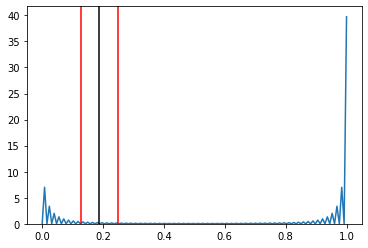

In [14]:
# Let's explore this graphically using kernel density estimate (kde)
sns.kdeplot(rep_handi_no_nans, legend=False)
# Add vline to display lower-bound
plt.axvline(x=rep_conf_int[1], color='red')
# Add vline to display upper-bound
plt.axvline(x=rep_conf_int[2], color='red')
# Add vline to display mean
plt.axvline(x=rep_conf_int[0], color='k');

In [15]:
  # Let's check the democratic side! 
dem_handi_inf = democrat['handicapped-infants']
dem_conf_int = confidence_interval(dem_handi_inf)
dem_conf_int

(0.6046511627906976, 0.5456230466811521, 0.6636792789002431)

In [16]:
dem_handi_inf.value_counts()

1.0    156
0.0    102
Name: handicapped-infants, dtype: int64

In [17]:
dem_handi_no_nans = dem_column('handicapped-infants')
dem_handi_no_nans.value_counts()


1.0    156
0.0    102
Name: handicapped-infants, dtype: int64

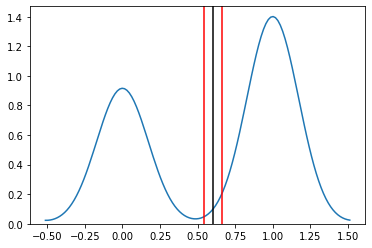

In [18]:
# Explore graphically using kernel density 
sns.kdeplot(dem_handi_no_nans, legend=False)
plt.axvline(x=dem_conf_int[1], color='red')
plt.axvline(x=dem_conf_int[2], color='red')
plt.axvline(x=dem_conf_int[0], color='k');

In [19]:
# Let's compare others! Let's look at our columns again to see what we have to work with
df.columns

Index(['Class Name', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [20]:
# Let's do education-spending next
rep_ed_spend = republican['education-spending']
dem_ed_spend = democrat['education-spending']
print(rep_ed_spend.head())
print(dem_ed_spend.head())

0     1.0
1     1.0
7     0.0
8     1.0
10    NaN
Name: education-spending, dtype: float64
2    0.0
3    0.0
4    NaN
5    0.0
6    0.0
Name: education-spending, dtype: float64


In [21]:
rep_ed_conf_int = confidence_interval(rep_ed_spend)
rep_ed_conf_int # mean, lower-bound, upper-bound

(0.8709677419354839, 0.8197396962110246, 0.9221957876599431)

In [0]:
# The returned values above indicate that the mean support of republicans for 
# the education-spending bill is about 87%, with a 95% confidence that the true 
# support mean will fall between the lower-bound (81.9%) and the upper-bound (92.2%)

In [23]:
print(rep_handi_inf.value_counts())
print(dem_handi_inf.value_counts())

0.0    134
1.0     31
Name: handicapped-infants, dtype: int64
1.0    156
0.0    102
Name: handicapped-infants, dtype: int64


In [24]:
rep_handi_inf_no_nans = rep_column('education-spending')
dem_handi_inf_no_nans = dem_column('education-spending')
print(rep_handi_no_nans.value_counts())
print(dem_handi_no_nans.value_counts())

0.0    134
1.0     31
Name: handicapped-infants, dtype: int64
1.0    156
0.0    102
Name: handicapped-infants, dtype: int64


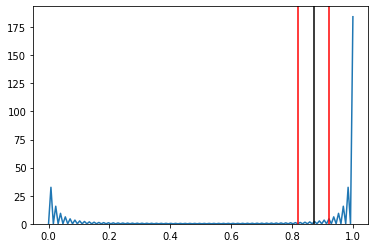

In [25]:
# Explore graphically
sns.kdeplot(rep_handi_inf_no_nans, legend=False)
plt.axvline(rep_ed_conf_int[1], color='red')
plt.axvline(rep_ed_conf_int[2], color='red')
plt.axvline(rep_ed_conf_int[0], color='k');

In [26]:
dem_ed_conf_int = confidence_interval(dem_ed_spend)
dem_ed_conf_int # mean, lower-bound, upper-bound

(0.14457831325301204, 0.10211748214309255, 0.18703914436293154)

In [0]:
# The above indicates that the mean support of democrats for the education-spending
# bill was 14.5%, and that there is a 95% confidence that the true support mean will 
# fall between the lower-bound (10.2%) and the upper-bound (18.7%)

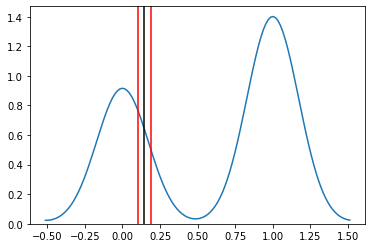

In [28]:
# Explore graphically
sns.kdeplot(dem_handi_no_nans, legend=False)
plt.axvline(dem_ed_conf_int[1], color='red')
plt.axvline(dem_ed_conf_int[2], color='red')
plt.axvline(dem_ed_conf_int[0], color='k');

In [29]:
# Let's look at religious-groups-in-schools
print(republican['religious-groups-in-schools'].value_counts())
print(democrat['religious-groups-in-schools'].value_counts())

1.0    149
0.0     17
Name: religious-groups-in-schools, dtype: int64
0.0    135
1.0    123
Name: religious-groups-in-schools, dtype: int64


In [30]:
rep_relig_in_school = republican['religious-groups-in-schools']
dem_relig_in_school = democrat['religious-groups-in-schools']
print(rep_relig_in_school.sample(5))
print(dem_relig_in_school.sample(5))

239    1.0
378    1.0
235    1.0
83     1.0
345    1.0
Name: religious-groups-in-schools, dtype: float64
32     0.0
31     0.0
78     1.0
221    1.0
68     0.0
Name: religious-groups-in-schools, dtype: float64


In [31]:
rep_relig_conf_int = confidence_interval(rep_relig_in_school)
rep_relig_conf_int

(0.8975903614457831, 0.8512698128095132, 0.943910910082053)

In [0]:
# The above indicates that the mean support of republicans for the religious groups in schools 
# bill is 89.7%, and that there is a 95% confidence that the true support mean lies between 
# the lower-bound (85.1%) and the upper-bound (94.3%)

In [54]:
# Deal with nans
rep_relig_in_school_no_nans = rep_column('religious-groups-in-schools')
dem_relig_in_school_no_nans = dem_column('religious-groups-in-schools')
print(rep_relig_in_school_no_nans.value_counts())
print(dem_relig_in_school_no_nans.value_counts())

1.0    149
0.0     17
Name: religious-groups-in-schools, dtype: int64
0.0    135
1.0    123
Name: religious-groups-in-schools, dtype: int64


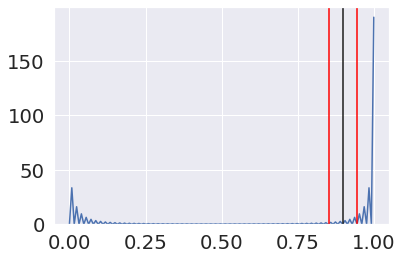

In [56]:
# Graph this
sns.kdeplot(rep_relig_in_school_no_nans, legend=False)
plt.axvline(rep_relig_conf_int[1], color='red')
plt.axvline(rep_relig_conf_int[2], color='red')
plt.axvline(rep_relig_conf_int[0], color='k');

In [58]:
dem_relig_conf_int = confidence_interval(dem_relig_in_school)
dem_relig_conf_int

(0.47674418604651164, 0.41644437131619555, 0.5370440007768278)

In [0]:
# The above indicates that the mean support of democrats for the religious groups in schools 
# bill is 47.6%, and that there is a 95% confidence that the true support mean lies between 
# the lower-bound (41.6%) and the upper-bound (53.7%). Because 50%, seen in the null 
# hypothesis, falls between the lower and upper-bounds, we are unable to reject
# the null hypothesis.

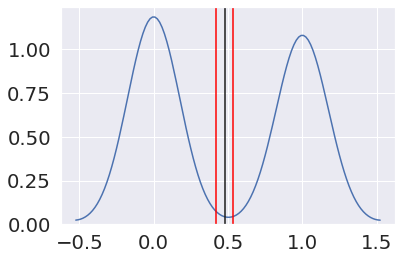

In [62]:
# Graph
sns.kdeplot(dem_relig_in_school_no_nans, legend=False)
plt.axvline(dem_relig_conf_int[1], color='red')
plt.axvline(dem_relig_conf_int[2], color='red')
plt.axvline(dem_relig_conf_int[0], color='k');

## Chi-Square

In [33]:
# Let's try the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [34]:
# Let's look at the categorical data
df.describe(exclude='number')

,Sex,Embarked
count,712,712
unique,2,3
top,male,Southampton
freq,453,554


In [35]:
# We know that Pclass and survived are also categorical. We can also create binned categories for age and fare
print(df['Age'].value_counts())
df['Age'].describe()

24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64


count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [36]:
# Create our cut points
cut_points = [0, 9, 19, 29, 39, 49, 59, 1000]
# Create our label names
label_names = ['0-9 years', '10-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60+ years']
# Create our new category
df['age_categories'] = pd.cut(df['Age'], cut_points, labels=label_names)
# Compare old and new
df[['Age', 'age_categories']]

,Age,age_categories
0,22.0,20-29 years
1,38.0,30-39 years
2,26.0,20-29 years
3,35.0,30-39 years
4,35.0,30-39 years
...,...,...
707,39.0,30-39 years
708,27.0,20-29 years
709,19.0,10-19 years
710,26.0,20-29 years


In [37]:
print(df['Fare'].value_counts())
df['Fare'].describe()

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
9.4750      1
13.4167     1
61.3792     1
14.1083     1
8.0292      1
Name: Fare, Length: 219, dtype: int64


count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [38]:
# Create cut points
fare_cut_points = [-1, 24, 49, 74, 99, 10000]
# Create label names
fare_label_names = ['$0-24', '$25-49', '$50-74', '$75-99', '$100+']
# create new category
df['fare_categories'] = pd.cut(df['Fare'], fare_cut_points, labels=fare_label_names)
# compare old and new
print(df[['Fare', 'fare_categories']])
df['fare_categories'].value_counts()

        Fare fare_categories
0     7.2500           $0-24
1    71.2833          $50-74
2     7.9250           $0-24
3    53.1000          $50-74
4     8.0500           $0-24
..       ...             ...
707  29.1250          $25-49
708  13.0000           $0-24
709  30.0000          $25-49
710  30.0000          $25-49
711   7.7500           $0-24

[712 rows x 2 columns]


$0-24     418
$25-49    155
$50-74     52
$100+      48
$75-99     39
Name: fare_categories, dtype: int64

In [39]:
# Let's sort by our fare_categories
df = df.sort_values(by='fare_categories', ascending=True)
print(df.head())
df.tail()

     Survived  Pclass     Sex  ...     Embarked  age_categories fare_categories
0           0       3    male  ...  Southampton     20-29 years           $0-24
421         0       3    male  ...    Cherbourg     10-19 years           $0-24
419         0       2    male  ...  Southampton     20-29 years           $0-24
418         0       3    male  ...  Southampton     30-39 years           $0-24
417         1       2  female  ...  Southampton     50-59 years           $0-24

[5 rows x 8 columns]


,Survived,Pclass,Sex,Age,Fare,Embarked,age_categories,fare_categories
314,1,1,female,23.0,113.2750,Cherbourg,20-29 years,$100+
92,0,1,male,24.0,247.5208,Cherbourg,20-29 years,$100+
568,1,1,female,38.0,227.5250,Cherbourg,30-39 years,$100+
247,1,1,female,18.0,262.3750,Cherbourg,10-19 years,$100+
260,1,1,female,36.0,135.6333,Cherbourg,30-39 years,$100+


In [40]:
# First let's create a crosstab comparing two categorical values we know are correlated
fare_by_class = pd.crosstab(df['Pclass'], df['fare_categories'], margins=True)
fare_by_class

fare_categories,$0-24,$25-49,$50-74,$75-99,$100+,All
Pclass,,,,,,
1,4,52,41,39,48,184
2,106,60,7,0,0,173
3,308,43,4,0,0,355
All,418,155,52,39,48,712


In [41]:
# Let's seperate these by classes
first_class = fare_by_class.iloc[0][:5].values
first_class

array([ 4, 52, 41, 39, 48])

In [42]:
second_class = fare_by_class.iloc[1][:5].values
second_class

array([106,  60,   7,   0,   0])

In [43]:
third_class = fare_by_class.iloc[2][:5].values
third_class

array([308,  43,   4,   0,   0])

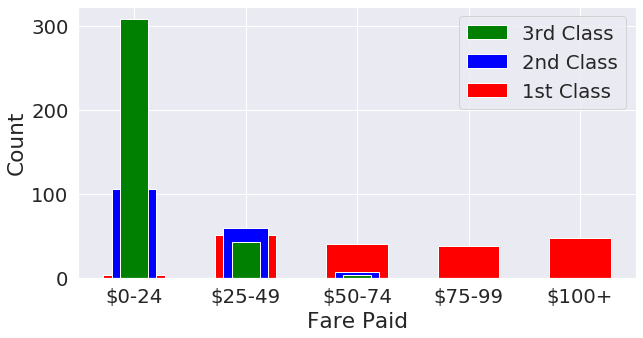

In [44]:
# Plot these!
fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.8)
categories = ['$0-24', '$25-49', '$50-74', '$75-99', '$100+']
p1 = plt.bar(categories, first_class, 0.55, color='red')
p2 = plt.bar(categories, second_class, 0.40, color='blue')
p3 = plt.bar(categories, third_class, 0.25, color='green')
plt.legend((p3[0], p2[0], p1[0]), ('3rd Class', '2nd Class', '1st Class'))
plt.xlabel("Fare Paid")
plt.ylabel("Count")
plt.show()

In [45]:
fare_by_class.head()

fare_categories,$0-24,$25-49,$50-74,$75-99,$100+,All
Pclass,,,,,,
1,4,52,41,39,48,184
2,106,60,7,0,0,173
3,308,43,4,0,0,355
All,418,155,52,39,48,712


In [46]:
# Let's do the expected value calculation
sum_rows = fare_by_class.iloc[0:3,5].values
sum_columns = fare_by_class.iloc[3, 0:5].values

print(sum_rows)
print(sum_columns)

[184 173 355]
[418 155  52  39  48]


In [47]:
# Make our total
total = fare_by_class.loc['All', 'All']
total

712

In [48]:
# Compare that to shape
df.shape[0]

712

In [49]:
expected_value = []
for i in range(len(sum_rows)):
  row_expected = []
  for column in sum_columns:
    val_expected = column * sum_rows[i] / total
    row_expected.append(val_expected)
  expected_value.append(row_expected)

expected_value = np.array(expected_value)
print(expected_value.shape)
print(expected_value)

(3, 5)
[[108.02247191  40.05617978  13.43820225  10.07865169  12.40449438]
 [101.56460674  37.66151685  12.63483146   9.4761236   11.66292135]
 [208.41292135  77.28230337  25.92696629  19.44522472  23.93258427]]


In [50]:
observed_value = pd.crosstab(df['Pclass'], df['fare_categories']).values
print(observed_value.shape)
observed_value

(3, 5)


array([[  4,  52,  41,  39,  48],
       [106,  60,   7,   0,   0],
       [308,  43,   4,   0,   0]])

In [51]:
# Let's determine the chisquare using Numpy
chisquared = ((observed_value - expected_value)**2 / (expected_value)).sum()
print(f'Chi-squared: {chisquared}')

Chi-squared: 507.2078677105663


In [52]:
# What's our degrees of freedom?
dof = (len(sum_rows) - 1) * (len(sum_columns) - 1)
print(f'Degrees of Freedom: {dof}')

Degrees of Freedom: 8


In [53]:
# Now let's find our chisquare using a single line in scipy
chisquared, p_value, dof, expected_value = stats.chi2_contingency(observed_value)

print(f"Chi-Squared: {chisquared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected: \n", np.array(expected_value))

Chi-Squared: 507.2078677105663
P-value: 1.9983666224256217e-104
Degrees of Freedom: 8
Expected: 
 [[108.02247191  40.05617978  13.43820225  10.07865169  12.40449438]
 [101.56460674  37.66151685  12.63483146   9.4761236   11.66292135]
 [208.41292135  77.28230337  25.92696629  19.44522472  23.93258427]]


In [64]:
# Let's find two more categorical columns
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'age_categories', 'fare_categories'],
      dtype='object')

In [65]:
# Let's look at the correlation between survived and sex
survived_by_sex = pd.crosstab(df['Survived'], df['Sex'], margins=True)
survived_by_sex

Sex,female,male,All
Survived,,,
0,64,360,424
1,195,93,288
All,259,453,712


In [0]:
# Seperate these into male and female
survived_by_sex = survived_by_sex.T


In [111]:
survived_by_sex

Survived,0,1,All
Sex,,,
female,64,195,259
male,360,93,453
All,424,288,712


In [112]:
female_survived = survived_by_sex.iloc[0][:2].values
female_survived

array([ 64, 195])

In [113]:
male_survived = survived_by_sex.iloc[1][:2].values
male_survived

array([360,  93])

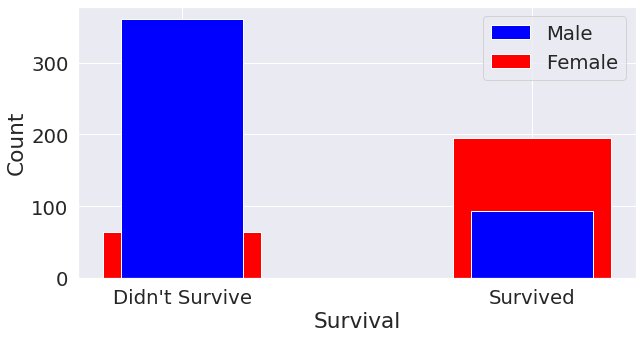

In [114]:
# Plot for funsies!
fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.8)
categories = ["Didn't Survive", "Survived"]
p1 = plt.bar(categories, female_survived, 0.45, color='red')
p2 = plt.bar(categories, male_survived, 0.35, color='blue')
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel("Survival")
plt.ylabel("Count")
plt.show()

In [115]:
survived_by_sex.head()

Survived,0,1,All
Sex,,,
female,64,195,259
male,360,93,453
All,424,288,712


In [116]:
# Expected value calculations
sum_rows = survived_by_sex.iloc[0:2, 2].values
print(sum_rows)
sum_columns = survived_by_sex.iloc[2, 0:2].values
print(sum_columns)

[259 453]
[424 288]


In [117]:
# Make our total
total = survived_by_sex.loc['All', 'All']
total

712

In [119]:
expected = []
for i in range(len(sum_rows)):
  expected_row = []
  for column in sum_columns:
    expected_val = column * sum_rows[i] / total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[154.23595506 104.76404494]
 [269.76404494 183.23595506]]


In [124]:
# Observed values
observed_values = pd.crosstab(df['Survived'], df['Sex']).values
print(observed_values.shape)
observed_values

(2, 2)


array([[ 64, 360],
       [195,  93]])

In [125]:
# Determine chisquare using numpy
chisquared = ((observed_values - expected)**2 / (expected)).sum()
print(f'Chi_squared: {chisquared}')

Chi_squared: 205.13648469340083


In [126]:
# Determine DoF
dof = (len(sum_rows)-1) * (len(sum_columns)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 1


In [127]:
# Run using scipy
chisquared, p_value, dof, expected = stats.chi2_contingency(observed_values)

print(f"Chi-Squared: {chisquared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected_value))

Chi-Squared: 202.86944877617123
P-value: 4.939416685451492e-46
Degrees of Freedom: 1
Expected: 
 [[154.23595506 104.76404494]
 [269.76404494 183.23595506]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)